In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class SklModelResult(): #     #         #         #         #         # 
    def __init__(self, data=None):
        self.x_train = data.get('x_train') if data else None
        self.x_val = data.get('x_val') if data else None
        self.y_train = data.get('y_train') if data else None
        self.y_val = data.get('y_val') if data else None
        self.sc_x_train = data.get('sc_x_train') if data else None
        self.sc_x_val = data.get('sc_x_val') if data else None
        self.sc_y_train = data.get('sc_y_train') if data else None
        self.sc_y_val = data.get('sc_y_val') if data else None
        self.is_standardization = data.get(
            'is_standardization') if data else None
        self.sc_x_model = data.get('sc_x_model') if data else None
        self.sc_y_model = data.get('sc_y_model') if data else None
        self.model = data.get('model') if data else None
        self.train_score = data.get('train_score') if data else None
        self.val_score = data.get('val_score') if data else None

class SklModel():
    # dataframe = None

    def __init__(self):
        self.model=None
        self.columns = None
        self.test_parameters = {}
        self.model_parameters = {}
        self.dataframe= None
        # self.dataframe_org= None
        self.filepath = None

    #step1 csvファイルの読込
    def set_filepath(self, filepath):
        self.filepath = filepath
        self.dataframe = pd.read_csv(filepath) # CSV読込
        # self.dataframe_org=self.dataframe.copy()
        return self.dataframe

    #step2 ダミー変数の設定
    def get_dummy_columns(self, df:pd.DataFrame, columns:list, drop=0):
        drop_flag = {0:False,1:True}
        # print(drop_flag[drop])
        for column in columns:
            dummy = pd.get_dummies(
                df[column], drop_first=drop_flag[drop], dtype=int)
            df = pd.concat([df, dummy], axis=1)
        df = df.drop(columns, axis=1)
        return df

    def set_test_parameters(self, parameters):
        self.test_parameters = parameters

    #step3
    def split(self,*parrays):
        # データを分割する
        return train_test_split(*parrays, **self.test_parameters)

    def set_target(self, target_column):
        self.target_column = target_column

        # 特徴量と正解ラベルを分割する
        if self.columns is None:
            columns = self.dataframe.drop(
                self.target_column, axis=1).columns.tolist()
            self.set_columns(columns)
        
        return self.target_column

    def get_target(self): return self.target_column

    def set_columns(self, columns):
        self.columns = columns
        return self.columns
        # return cls.columns := columns

    def get_columns(self):
        return self.columns
    
    def fillna_meaning(self, df) -> pd.DataFrame:
        return df.fillna(df.mean())
    
    def ss_transform(self, df, model=None):
        if (model is None):
            sc_model_x = StandardScaler() #訓練データxの標準化モデル
            sc_model_x.fit(df)
            sc_x = sc_model_x.transform(df) #標準化されたxのdfデータ
            return sc_x, sc_model_x
        else:
            sc_model_x = model
            sc_x = sc_model_x.transform(df) #標準化されたxのdfデータ
            return sc_x

    def set_model_parameters(self, parameters):
        self.model_parameters = parameters

    def get_model_parameters(self):
        return self.model_parameters

    def init_model(self,model_name=""):
        self.models=[
            "DecisionTreeClassifier",
            "DecisionTreeRegressor",
            "LinearRegression",
        ]
        if model_name not in self.models : return None
        self.model_name = model_name
        if model_name == "DecisionTreeClassifier":
            return DecisionTreeClassifier(**self.model_parameters)
        elif model_name == "LinearRegression":
            return LinearRegression(**self.model_parameters)
        elif model_name == "DecisionTreeRegressor":
            return DecisionTreeRegressor(**self.model_parameters)
        else:
            return None

    def learn(self, x, y, is_test_split=False
              , is_standardization=False, x_model=None, y_model=None):
        ###テスト分割
        if (is_test_split == True):
            x_train, x_val, y_train, y_val = train_test_split(
                x, y, **self.test_parameters)
            ### 訓練データを標準化
            if(x_model is None or y_model is None):
                sc_x_model = StandardScaler()
                sc_y_model = StandardScaler()
                sc_x_model.fit(x_train)
                sc_x_train = sc_x_model.transform(x_train)
                sc_y_model.fit(y_train)
                sc_y_train = sc_y_model.transform(y_train)
            else:
                sc_x_train = x_train
                sc_y_train = y_train
            ### 学習
            # model = LinearRegression()
            model = self.init_model(self.model_name)
            model.fit(sc_x_train, sc_y_train)
            ### 検証データを標準化
            sc_x_val = sc_x_model.transform(x_val)
            sc_y_val = sc_y_model.transform(y_val)
            ### 訓練データと検証データの決定係数計算
            train_score = model.score(sc_x_train, sc_y_train)
            val_score = model.score(sc_x_val, sc_y_val)

            ### 戻り値
            ret = {
                'x_train': x_train,
                'x_val': x_val,
                'y_train': y_train,
                'y_val': y_val,
                'sc_x_train': sc_x_train,
                'sc_x_val': sc_x_val,
                'sc_y_train': sc_y_train,
                'sc_y_val': sc_y_val,
                'is_standardization': is_standardization,
                'sc_x_model': sc_x_model,
                'sc_y_model': sc_y_model,
                'model': model,
                'train_score': train_score,
                'val_score': val_score,
            }
        else:
            ### 訓練データを標準化
            x_train=x
            y_train=y
            if(x_model is None or y_model is None):
                sc_x_model = StandardScaler()
                sc_y_model = StandardScaler()
                sc_x_model.fit(x_train)
                sc_x_train = sc_x_model.transform(x_train)
                sc_y_model.fit(y_train)
                sc_y_train = sc_y_model.transform(y_train)
            else:
                sc_x_train = x_train
                sc_y_train = y_train
            ### 学習
            # model = LinearRegression()
            model = self.init_model(self.model_name)
            model.fit(sc_x_train, sc_y_train)
            ### 検証データを標準化
            # sc_x_val = sc_x_model.transform(x_val)
            # sc_y_val = sc_y_model.transform(y_val)
            ### 訓練データと検証データの決定係数計算
            train_score = model.score(sc_x_train, sc_y_train)
            # val_score = model.score(sc_x_val, sc_y_val)

            ### 戻り値
            ret = {
                'x_train': x_train,
                'x_val': None,
                'y_train': y_train,
                'y_val': None,
                'sc_x_train': sc_x_train,
                'sc_x_val': None,
                'sc_y_train': sc_y_train,
                'sc_y_val': None,
                'is_standardization': is_standardization,
                'sc_x_model': sc_x_model,
                'sc_y_model': sc_y_model,
                'model': model,
                'train_score': train_score,
                'val_score': None,
            }
        return SklModelResult(ret)



#8-1 CSVの読込
import matplotlib.pyplot as plt #plot用の初期化
%matplotlib inline
sm=SklModel()
df = sm.set_filepath("../datafiles/Boston.csv")
df.head(2)

#8-3 CRIMEの調査
df['CRIME'].value_counts()

#8-4 ダミー変数設定(自動化候補)
df2 = sm.get_dummy_columns(df, ['CRIME'], 1)
df2

#8-5 columnsもtargetも設定が無いので全てのcolumnsを分割
sm.set_test_parameters({"test_size": 0.2, "random_state": 0})
train_val,test = sm.split(df2)
train_val,test

#8-6 欠損値があるかどうかの確認
train_val.isnull().sum()

#8-7 欠損値を平均値で穴埋め（自動化候補）
train_val2 = sm.fillna_meaning(train_val)
train_val2

# #8-8-2 外れ値の確認
# fig = plt.figure(figsize=(8,10))
# colname = train_val2.columns
# colname
# # for name in colname[:13]:
# for n, col in enumerate(colname):
#     train_val2.plot(
#         ax=fig.add_subplot(5,3,n+1), kind='scatter'
#         , x= col, y='PRICE', s=3)
# plt.tight_layout()
# plt.show()

#8-9 外れ値が存在するインデックスの確認
# RMの外れ値
out_line1 = train_val2[(train_val2['RM'] < 6) &
(train_val2['PRICE'] > 40)].index
# PTRATIOの外れ値
out_line2 = train_val2[(train_val2['PTRATIO'] > 18) &
    (train_val2['PRICE'] > 40)].index
# print(out_line1, out_line2)

#8-10 外れ値の削除
train_val3 = train_val2.drop([76], axis = 0)

#8-11 予測に使用する特徴量の列以外を取り除く
col = ['INDUS', 'NOX', 'RM', 'PTRATIO', 'LSTAT', 'PRICE']
train_val4 = train_val3[col]
train_val4.head(3)

#8-12 各列同士の相関係数を調べる
train_val4.corr()

#8-13 PRICE列との相関係数を調べる
train_cor = train_val4.corr()['PRICE']
train_cor

#8-16 各要素を絶対値に変換
abs_cor = train_cor.map(abs)
abs_cor

#8-17 降順
abs_cor.sort_values(ascending = False)

#8-18 データ分割して訓練データと検証データに
col =sm.set_columns(['RM', 'LSTAT', 'PTRATIO'])
target = sm.set_target(['PRICE'])
x = train_val4[col]
t = train_val4[target]
x_train, x_val, y_train, y_val = sm.split(x,t)
x_train, x_val, y_train, y_val

#8-19 データ標準化
# sc_model_x = StandardScaler() #訓練データxの標準化モデル
# sc_model_x.fit(x_train)

# # 各列のデータを標準化してsc_xに代入
# sc_x = sc_model_x.transform(x_train) #標準化されたxのdfデータ
# sc_x # 表示
sc_x, sc_model_x = sm.ss_transform(x_train)
sc_x, sc_model_x

#8-20 見やすくして平均値0（ほぼ0）を確認 = 標準化された
# array 型だと見づらいのでデータフレームに変換
tmp_df = pd.DataFrame(sc_x, columns = x_train.columns)
# 平均値の計算
tmp_df.mean()

#8-21 標準偏差の計算
tmp_df.std() # 標準偏差の計算

#8-22 正解データを標準化
sc_y,sc_model_y = sm.ss_transform(y_train)
sc_y

#8-23 標準化したデータで学習
# sm.set_model_parameters({"max_depth":5
#                         ,"random_state":0,"class_weight":'balanced'})
# model=sm.init_model("DecisionTreeClassifier")

# sm.set_model_parameters({"max_depth":5,"random_state":0})
# model=sm.init_model("DecisionTreeRegressor")

sm.set_model_parameters({"fit_intercept":True})
model=sm.init_model("LinearRegression")

model.fit(sc_x,sc_y)

#8-24 決定係数を求める
model.score(x_val,y_val)

# 8-25検証データを「訓練データのモデルで」標準化
sc_x_val = sm.ss_transform(x_val,sc_model_x)
sc_y_val = sm.ss_transform(y_val,sc_model_y)
sc_x_val, sc_y_val
model.score(sc_x_val, sc_y_val) # 標準化した検証データで決定係数を計算

###8-27 learn関数
x = train_val3.loc[ :, ['RM', 'LSTAT', 'PTRATIO']]
t = train_val3[['PRICE']]
ret = sm.learn(x, t, True, True)
print(ret.train_score, ret.val_score)

#8-29
x = train_val3.loc[ :, ['RM', 'LSTAT', 'PTRATIO','INDUS']]
t = train_val3[['PRICE']]
ret = sm.learn(x, t, True, True)
print(ret.train_score, ret.val_score)

#8-30
x['RM'] ** 2

#8-31
# RM2乗のシリーズを新しい列として追加
x['RM2'] = x['RM'] ** 2
# コード8-29で、INDUS列を追加したので削除
x = x.drop('INDUS', axis = 1)
x.head(2)

#8-33
ret = sm.learn(x, t, True, True)
print(ret.train_score, ret.val_score)

#8-34
# LSTAT列の2乗を追加
x['LSTAT2'] = x['LSTAT'] ** 2
ret = sm.learn(x, t, True, True)
print(ret.train_score, ret.val_score)

# PTRATIO列の2乗を追加
x['PTRATIO2'] = x['PTRATIO'] ** 2
ret = sm.learn(x, t, True, True)
print(ret.train_score, ret.val_score)

#8-36
x['RM * LSTAT'] = x['RM'] * x['LSTAT']
x.head(2)

#8-37
ret = sm.learn(x, t, True, True)
print(ret.train_score, ret.val_score)

#    def learn(self, x, y
#              , is_standardization=False, x_model=None, y_model=None):

# code 8-38
# 訓練データと検証データを合わせて再学習させるので
# 再度、標準化する

# sc_x,sc_model_x2 = sm.ss_transform(x)
# sc_y,sc_model_y2 = sm.ss_transform(t)
ret=sm.learn(x,t, False, True)
# model = LinearRegression()
# model.fit(sc_x, sc_y)

# code 8-39
test2 = test.fillna(train_val.mean()) # 欠損値を平均値で補完
x_test = test2.loc[ :, ['RM','LSTAT', 'PTRATIO'] ]
y_test = test2[['PRICE']]

x_test['RM2'] = x_test['RM'] ** 2
x_test['LSTAT2'] = x_test['LSTAT'] ** 2
x_test['PTRATIO2'] = x_test['PTRATIO'] ** 2

x_test['RM * LSTAT'] = x_test['RM'] * x_test['LSTAT']

sc_x_test = ret.sc_x_model.transform(x_test)
sc_y_test = ret.sc_y_model.transform(y_test)

ret.model.score(sc_x_test, sc_y_test)
#0.7649249353669053


0.7175897572515981 0.7359028880290998
0.7190252930186809 0.7295535344941491
0.8456207631185566 0.8372526287986777
0.8565689444345094 0.8425282632102126
0.8643834988984441 0.8678022326740733
0.8668534967796697 0.8739347357775972


c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.7649249353669053

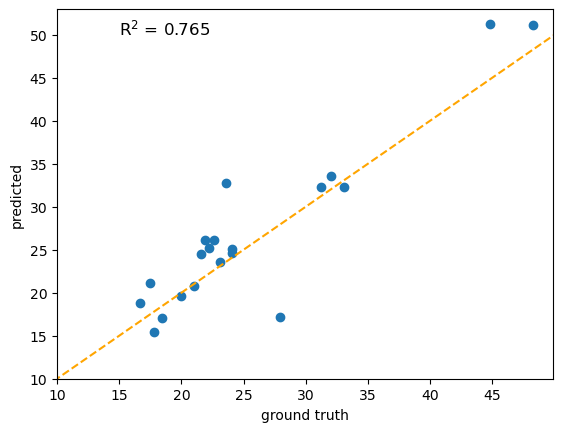

In [32]:
### 評価 -#---------#---------#---------#---------#---------#---------#-
scorestr = r'R$^2$ = {:.3f}'.format(
    ret.model.score(sc_x_test, sc_y_test)) # 評価値の表示を整形
scorestr

pred = ret.model.predict(sc_x_test) #モデルでテストデータから予測
pred

# 標準化逆変換 #モデルが標準化後の値を返すので逆変換して分散をplot
plt.scatter(ret.sc_y_model.inverse_transform(sc_y_test), 
            ret.sc_y_model.inverse_transform(pred))

# 相関グラフ表示
plt.xlabel('ground truth') #x軸のラベルを追加
plt.ylabel('predicted') #y軸のラベルを追加
plt.xlim([10, plt.xlim()[1]]) #x軸の目盛りを10～に
plt.ylim([10, plt.ylim()[1]]) #y軸の目盛りを10～に

#評価値をplot
plt.text(15, 50, scorestr, fontsize=12)
_ = plt.plot([-100, 100], [-100, 100], color='orange', linestyle='dashed')
